# Importando datos y librerías

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
sys.path.append('/content/gdrive/My Drive/laboral/proyectos/covid19Col/')

import pandas as pd
from numpy import array, arange
from pylab import plot, show, grid, xticks, xlim, ylim, rcParams, legend, xlabel, ylabel, text
from pylab import xscale, yscale

filePath = "gdrive/My Drive/laboral/proyectos/covid19Col/COVID-19-INS-DESCARGA - Hoja 1.csv" #Casos1_12abr2020.csv"
data = pd.read_csv(filePath)

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# Leyendo datos (Abril 15 de 2020, 8:53 a.m.)

In [2]:
data.head()

,ID de caso,Fecha de diagnóstico,Ciudad de ubicación,Departamento o Distrito,Atención**,Edad,Sexo,Tipo*,País de procedencia
0,1,06/03/2020,BOGOTA,BOGOTÁ D.C.,Recuperado,19,F,Importado,ITALIA
1,2,09/03/2020,BUGA,VALLE DEL CAUCA,Recuperado,34,M,Importado,ESPAÑA
2,3,09/03/2020,MEDELLIN,ANTIOQUIA,Recuperado,50,F,Importado,ESPAÑA
3,4,11/03/2020,MEDELLIN,ANTIOQUIA,Recuperado,55,M,Relacionado,COLOMBIA
4,5,11/03/2020,MEDELLIN,ANTIOQUIA,Recuperado,25,M,Relacionado,COLOMBIA


## Evolución del número de infectados

In [0]:
infecTime = pd.DataFrame(data, columns = ['Fecha de diagnóstico']) #,'Sexo','Edad'])
timeEvol = infecTime.sum(axis=1)

#deadTime = pd.DataFrame( data, columns = ['Fecha de diagnóstico', 'Atención**'] )
#deadEvol = deadTime[ deadTime['Atención**'] == 'Fallecido' ].groupby('Fecha de diagnóstico').sum()
#histoDead = deadEvol.sum(axis=1).str.count('Fallecido')

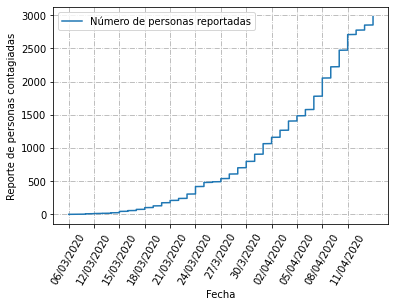

In [4]:
plot(timeEvol.values, timeEvol.index,label='Número de personas reportadas')
xticks(arange(0, 35, step=3.), rotation=60)
grid(ls='-.')
#xlim(0,1)
#ylim(-1,5)
xlabel('Fecha')
ylabel('Reporte de personas contagiadas')
legend()

show()

# Análisis de infectados por edad y sexo

In [0]:
fechaEdadSexo = pd.DataFrame(data, columns= ['Fecha de diagnóstico','Sexo','Edad'])

## Porcentaje por sexo

In [6]:
histo = fechaEdadSexo.groupby('Edad')['Sexo'].sum()

male = histo.str.count('M')
female = histo.str.count('F')
total = male.sum()+female.sum()

print("Total infectados:", total)
print("Hombres infectados:",male.sum(), round((male.sum()/total)*100,2), "%")
print("Mujeres infectados:",female.sum(), round((female.sum()/total)*100,2), "%")

Total infectados: 2979
Hombres infectados: 1529 51.33 %
Mujeres infectados: 1450 48.67 %


## Distribución de infectados por edad y sexo

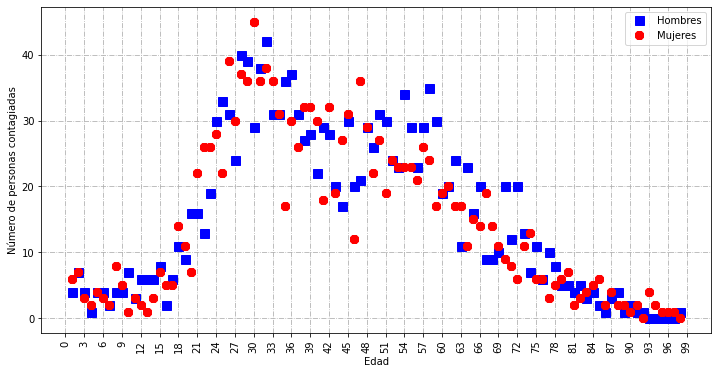

In [7]:
rcParams['figure.figsize'] = 12, 6

plot(histo.str.count('M'),'bs', markersize=9, label='Hombres')
plot(histo.str.count('F'),'r8', markersize=8, label='Mujeres')
xticks(arange(0, 100, step=3.), rotation=90)
grid(ls='-.')
#xlim(0,10)
xlabel('Edad')
ylabel('Número de personas contagiadas')
legend()
show()

## Media y desviación estándar de infectados por edad y sexo

In [8]:
meanSex = fechaEdadSexo.groupby('Sexo').mean()
stdSex = fechaEdadSexo.groupby('Sexo').std()

print( "Promedio Mujeres contagiadas:", round(meanSex.iloc[0][0], 2) )
print( "Promedio Hombres contagiados:", round(meanSex.iloc[1][0], 2) )
print()

print("-------")
print()
print( "Desv. Estand. Mujeres contagiadas:", round(stdSex.iloc[0][0], 2) )
print( "Desv. Estand. Hombres contagiados:", round(stdSex.iloc[1][0], 2) )

Promedio Mujeres contagiadas: 43.04
Promedio Hombres contagiados: 43.96

-------

Desv. Estand. Mujeres contagiadas: 18.2
Desv. Estand. Hombres contagiados: 17.99


# Análisis de fallecidos por edad y sexo

In [0]:
fallEdadSexo = pd.DataFrame(data, columns= ['Fecha de diagnóstico','Atención**','Sexo','Edad'])

## Porcentaje de fallecidos por sexo

In [10]:
histo = fallEdadSexo.groupby('Atención**')['Sexo'].sum()

fllMuj = histo.loc['Fallecido'].count('F')
fllHom = histo.loc['Fallecido'].count('M')
fllTot = fllMuj + fllHom

print("Total fallecidos:", fllTot)
print("Hombres fallecidos:", fllHom, ";", round((fllHom/fllTot)*100,2), "%")
print("Mujeres fallecidas:", fllMuj, ";", round((fllMuj/fllTot)*100,2), "%")

Total fallecidos: 127
Hombres fallecidos: 79 ; 62.2 %
Mujeres fallecidas: 48 ; 37.8 %


## Distribución de fallecidos por edad y sexo

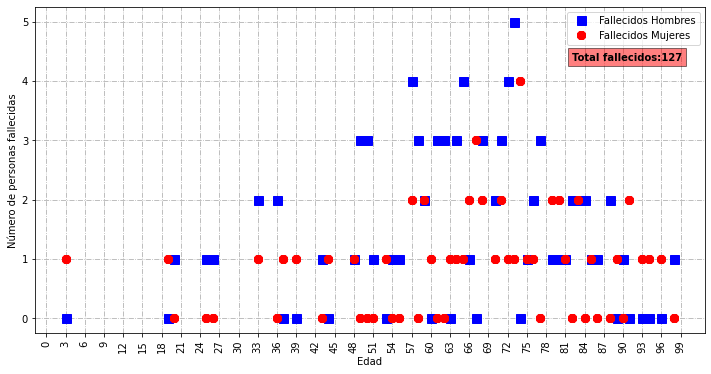

In [14]:
histo = fallEdadSexo.groupby(['Atención**','Edad'])['Sexo'].sum()
rcParams['figure.figsize'] = 12, 6

plot(histo['Fallecido'].str.count('M'),'bs', markersize=9, label='Fallecidos Hombres')
plot(histo['Fallecido'].str.count('F'),'r8', markersize=8, label='Fallecidos Mujeres')
xticks(arange(0, 100, step=3.), rotation=90)
grid(ls='-.')
#xlim(0,10)
xlabel('Edad')
ylabel('Número de personas fallecidas')
legend()
tfll = "Total fallecidos:" + str(fllTot)
text(82,4.35, tfll, fontsize=10, weight='bold', bbox=dict(facecolor='red', alpha=0.5))
show()

## Media y desviación estándar de fallecidos por edad y sexo

In [12]:
#meanSex = fechaEdadSexo.groupby('Sexo').mean()

meanSex = fallEdadSexo[fallEdadSexo['Atención**'] == 'Fallecido'].groupby('Sexo').mean()
stdSex = fallEdadSexo[fallEdadSexo['Atención**'] == 'Fallecido'].groupby('Sexo').std()

print( "Promedio Mujeres fallecidas:", round(meanSex.iloc[0][0], 2) )
print( "Promedio Hombres fallecidos:", round(meanSex.iloc[1][0], 2) )
print()

print("-------")
print()
print( "Desv. Estand. Mujeres fallecidas:", round(stdSex.iloc[0][0], 2) )
print( "Desv. Estand. Hombres fallecidos:", round(stdSex.iloc[1][0], 2) )

Promedio Mujeres fallecidas: 67.44
Promedio Hombres fallecidos: 64.62

-------

Desv. Estand. Mujeres fallecidas: 18.86
Desv. Estand. Hombres fallecidos: 15.92
